In [1]:
%matplotlib notebook
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('logre_results_momentum.pkl', 'rb') as pkl:
    results = pickle.load(pkl)

<IPython.core.display.Javascript object>


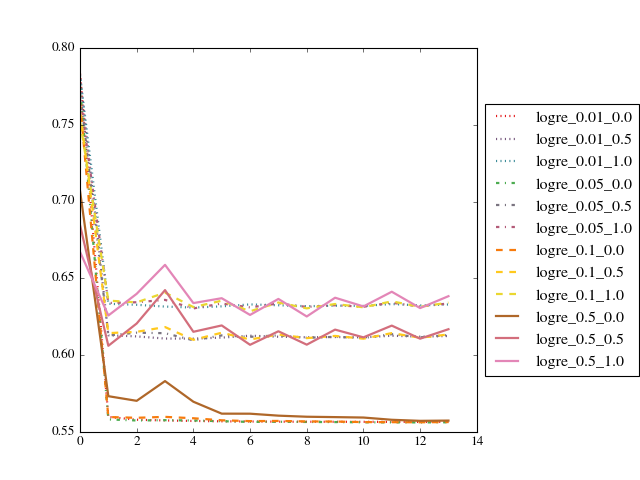

/home/jkim/Software/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


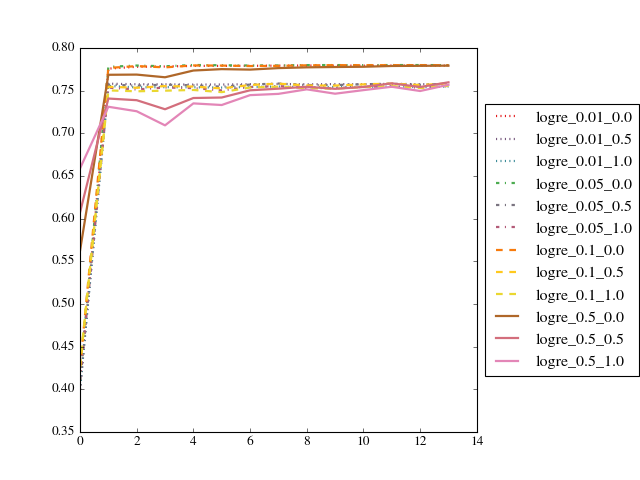

<IPython.core.display.Javascript object>


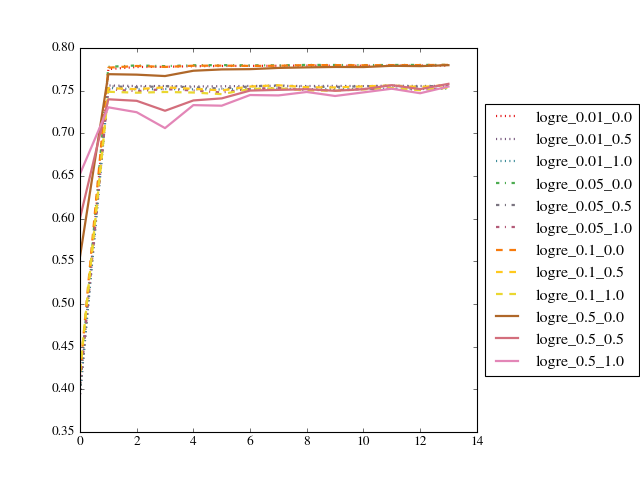

<IPython.core.display.Javascript object>


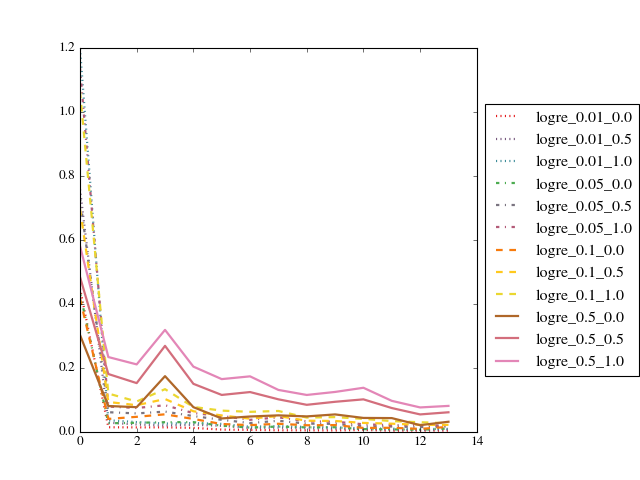

<IPython.core.display.Javascript object>


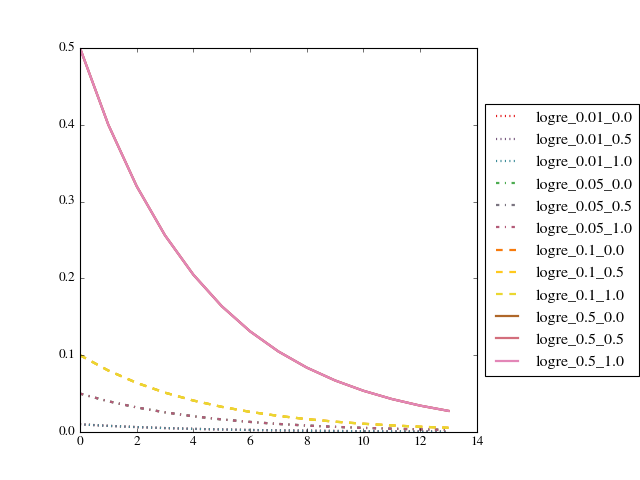

In [3]:
plotting_vars = ['loss', 'result_train', 'result_val', 'g_norm', 'learning_rate']
colormap = plt.get_cmap('Set1')

def get_line_style(key):
    if key.startswith('logre_0.01'):
        return ':'
    if key.startswith('logre_0.05'):
        return '-.'
    if key.startswith('logre_0.1'):
        return '--'
    return '-'

for key in plotting_vars:
    plt.figure(key)
    plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(results))])
for result in results:
    for key in plotting_vars:
        ax = plt.figure(key).gca()
        if key.startswith('result'):
            ax.plot([r['auc'] for r in result[key]], label = result['model'], lw = 2, 
                    linestyle = get_line_style(result['model']))
        else:
            ax.plot(result[key], label = result['model'], lw = 2, linestyle = get_line_style(result['model']))
for key in plotting_vars:
    ax = plt.figure(key).gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<IPython.core.display.Javascript object>


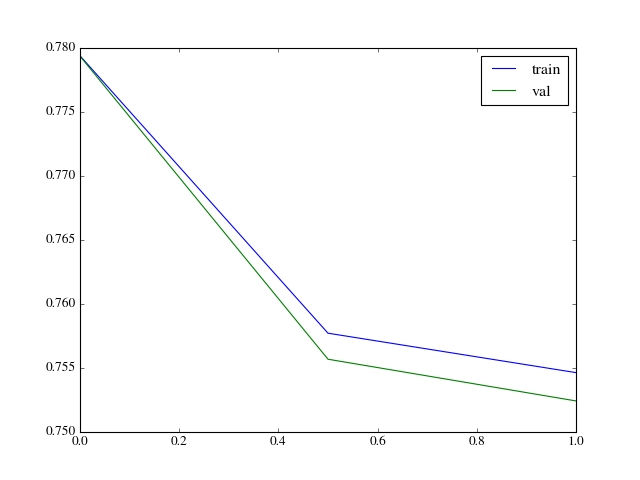

In [7]:
plotting_vars = ['result_train', 'result_val']

regs = [0.0, 0.5, 1.0]
train = []
val = []
for reg in regs:
    for result in results:
        if result['model'] == 'logre_0.01_{:.1f}'.format(reg):
            train.append(result['result_train'][-1]['auc'])
            val.append(result['result_val'][-1]['auc'])

ax = plt.figure().gca()
ax.plot(regs, train, label='train')
ax.plot(regs, val, label='val')
ax.legend()
        